In [1]:
import sagemaker

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/DEMO-pytorch-dcgan'

role = sagemaker.get_execution_role()

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-903447430181


In [2]:
import os
import subprocess

instance_type = 'local'

if subprocess.call('nvidia-smi') == 0:
    ## Set type to GPU if one is present
    instance_type = 'local_gpu'
    
print("Instance type = " + instance_type)

Instance type = local_gpu


In [3]:
from utils import *

In [4]:
image_size = 64
batch_size = 128
workers = 6

transform = transforms.Compose([transforms.Scale(image_size),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

train_loader = torch.utils.data.DataLoader(
             datasets.ImageFolder('../../data',
                transform=transform),
                batch_size=batch_size, shuffle=True,
              num_workers=workers, pin_memory=True)

/home/ec2-user/SageMaker/envs/danulab1/lib/python3.6/site-packages/torchvision/transforms/transforms.py:200: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


# Data preview

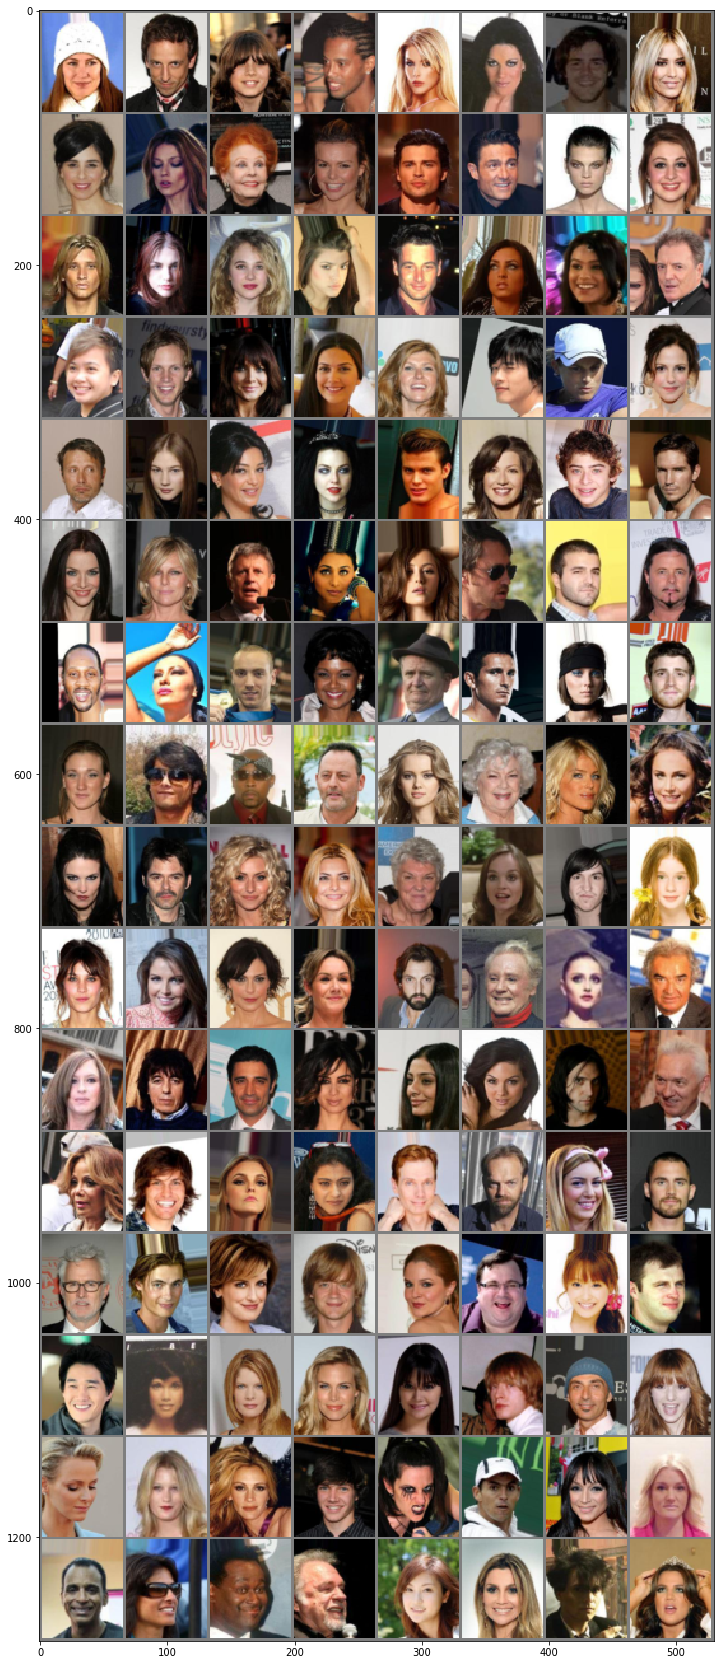

In [5]:

import numpy as np
import torchvision, torch

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(40, 30)


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [6]:
inputs = 's3://aws-ai/test-data/celebA'

In [7]:
from sagemaker.pytorch import PyTorch

dcgan_estimator = PyTorch(entry_point='main-dcgan.py',
                          source_dir='../src/',
                          role=role,
                          framework_version='1.0.0.dev',
                          train_instance_count=1,
                          train_instance_type='ml.p3.8xlarge',
                          hyperparameters={'epochs': 2},
                          base_job_name='DCGAN')

In [ ]:
dcgan_estimator.fit(inputs)

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-903447430181
INFO:sagemaker:Creating training-job with name: DCGAN-2018-11-27-10-43-41-125


2018-11-27 10:43:41 Starting - Starting the training job...
2018-11-27 10:43:43 Starting - Launching requested ML instances......
2018-11-27 10:44:46 Starting - Preparing the instances for training......
2018-11-27 10:46:09 Downloading - Downloading input data
2018-11-27 10:46:09 Training - Downloading the training image......
2018-11-27 10:47:07 Training - Training image download completed. Training in progress..
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2018-11-27 10:47:08,018 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2018-11-27 10:47:08,062 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2018-11-27 10:47:08,069 sagemaker_pytorch_container.training INFO     Invoking user training script.
2018-11-27 10:47:08,364 sagemaker-containers INFO     Module main-dcgan does not provide a setup.py. 
Generating setup.py
2018-11-27 10:47:08,364 s

  Added tensorflow-gpu from https://files.pythonhosted.org/packages/0a/b2/eea4d2afb868403dbbc0518e0a62814c59517ab2bff20d5d754ba7984b2c/tensorflow_gpu-1.12.0-cp35-cp35m-manylinux1_x86_64.whl#sha256=d02f018e46ee0d45a86bd27c5635b936330ab7e180c43029d1b3c4cebc7c2c45 (from -r requirements.txt (line 2)) to build tracker '/tmp/pip-req-tracker-10fj7t8c'
  Removed tensorflow-gpu from https://files.pythonhosted.org/packages/0a/b2/eea4d2afb868403dbbc0518e0a62814c59517ab2bff20d5d754ba7984b2c/tensorflow_gpu-1.12.0-cp35-cp35m-manylinux1_x86_64.whl#sha256=d02f018e46ee0d45a86bd27c5635b936330ab7e180c43029d1b3c4cebc7c2c45 (from -r requirements.txt (line 2)) from build tracker '/tmp/pip-req-tracker-10fj7t8c'
  1 location(s) to search for versions of tensorboard:
  * https://pypi.org/simple/tensorboard/
  Getting page https://pypi.org/simple/tensorboard/
  Looking up "https://pypi.org/simple/tensorboard/" in the cache
  Request header has "max_age" as 0, cache bypassed
  https://pypi.org:443 "GET /simple/t

  Created temporary directory: /tmp/pip-wheel-ude36v3m
  Running setup.py bdist_wheel for main-dcgan: started
  Destination directory: /tmp/pip-wheel-ude36v3m
  Running command /usr/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-req-build-ek1x1dhg/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-ude36v3m --python-tag cp35
  running bdist_wheel
  The [wheel] section is deprecated. Use [bdist_wheel] instead.
  running build
  running build_py
  creating build
  creating build/lib
  copying neural_net.py -> build/lib
  copying utils.py -> build/lib
  copying setup.py -> build/lib
  copying main-dcgan.py -> build/lib
  running egg_info
  creating main_dcgan.egg-info
  writing main_dcgan.egg-info/PKG-INFO
  writing top-level names to main_dcgan.egg-info/top_level.txt
  writing dependency_links to main_dcgan.egg-info/dependency_links.txt
  writing manifest

  changing mode of /usr/local/bin/tflite_convert to 755
  changing mode of /usr/local/bin/saved_model_cli to 755
  changing mode of /usr/local/bin/toco to 755
  changing mode of /usr/local/bin/toco_from_protos to 755
  changing mode of /usr/local/bin/freeze_graph to 755
  changing mode of /usr/local/bin/tensorboard to 755





  changing mode of /usr/local/bin/imageio_download_bin to 755
  changing mode of /usr/local/bin/imageio_remove_bin to 755

  Removing source in /tmp/pip-install-stl82suc/main-dcgan
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-10fj7t8c'
1 location(s) to search for versions of pip:
* https://pypi.org/simple/pip/
Getting page https://pypi.org/simple/pip/
Looking up "https://pypi.org/simple/pip/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/pip/ HTTP/1.1" 304 0
Analyzing links from page https://pypi.org/simple/pip/
  Found link https://files.pythonhosted.

NCCL version 2.2.13+cuda9.2
2018-11-27 10:48:13,231 sagemaker-containers ERROR    ExecuteUserScriptError:
Command "/usr/bin/python -m main-dcgan --epochs 2"
/usr/local/lib/python3.5/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")
Traceback (most recent call last):
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/main-dcgan.py", line 367, in <module>
    _train(args)
  File "/usr/local/lib/python3.5/dist-packages/main-dcgan.py", line 323, in _train
    plot_loss(Disc_loss_list, Gen_loss_lis

In [44]:
!pip install matplotlib